In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 40
batch_size = 100
learning_rate = 0.001

In [2]:
def get_tensor_info(tensor):
    """
    해당 tensor의 정보를 출력하는 함수
    requires_grad: 해당 tensor의 gradient를 계산이 가능한가?
    is_reaf: gradient를 grad에 저장할 것인가?
    grad_fn: local gradient
    grad: 해당 tensor의 gradient값
    """
    info = []
    for name in ['requires_grad', 'is_leaf', 'grad_fn', 'grad']:
        if name == 'grad':
            info.append(f'{name}({tensor.mean()})')
        else:
            info.append(f'{name}({getattr(tensor, name)})')
        
    return ' '.join(info)

### MNIST dataset 정의하기

In [3]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

### 정해진 조건(batch_size, transform, shuffle등등)으로 데이터를 공급할수 있는 dataloader 정의하기

In [4]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

### 2-Layer linear 모델 정의하기

In [23]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.relu()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

### model parameter(weight, bias) 확인하기
- nn.Linear함수는 default로 bias가 True로 되어 있어 [output_dim, input_dim], [output_dim] 2개 array의 파라미터를 가지고 있다.
- nn.Linear 매개변수로 bias를 False로 하면 [output_dim, input_dim] array 1개의 파라미터만 생성된다.

#### bias가 True 일때

In [6]:
params = list(model.parameters())

print(f'bias True 일때 parameter array 총 개수:{len(params)}')
for i in range(len(params)):
    print(f'parameter array shape: {params[i].shape}')

bias True 일때 parameter array 총 개수:4
parameter array shape: torch.Size([500, 784])
parameter array shape: torch.Size([500])
parameter array shape: torch.Size([10, 500])
parameter array shape: torch.Size([10])


#### bias가 False 일때

In [49]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size, bias=False) 
        self.relu = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size, num_classes, bias=False)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [9]:
params = list(model.parameters())

print(f'bias True 일때 parameter array 총 개수:{len(params)}')
for i in range(len(params)):
    print(f'parameter array shape: {params[i].shape}')

bias True 일때 parameter array 총 개수:2
parameter array shape: torch.Size([500, 784])
parameter array shape: torch.Size([10, 500])


### Loss값 및 gradient값 확인하기

In [50]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## backpropagation전 후 weight 값 확인하기

In [ ]:
params = list(model.parameters())
parmas.shape

In [ ]:
parmas[0]

In [43]:
optimizer.zero_grad()
params = list(model.parameters())
print(f'zero_grad:')
for i in range(len(params)):
    print(f'    grad {params[i].grad}')

zero_grad:
    grad None
    grad None


In [53]:
for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    output = model(images)
    loss = criterion(output, labels)
    
    print('================================================')
    optimizer.zero_grad()
    
    
    zero_grad_list = []
    params = list(model.parameters())
    print(f'zero_grad:')
    for i in range(len(params)):
        print(f'    grad {params[i].grad.mean()}')
        print(f'    weight {params[i].mean().detach().item()}')
    print('----------------------------------------------')
    
    loss.backward()
    backward_list = []
    params = list(model.parameters())
    print(f'backward:')
    for i in range(len(params)):
        print(f'    grad {params[i].grad.mean()}')
        print(f'    weight {params[i].mean().detach().item()}')
    print('----------------------------------------------')
    
    optimizer.step()
    step_list = []
    params = list(model.parameters())
    print(f'gradient step:')
    for i in range(len(params)):
        print(f'    grad {params[i].grad.mean()}')
        print(f'    weight {params[i].mean().detach().item()}')
    print('================================================')
    print()
    
    
    

    #print(loss.item())

zero_grad:
    grad 0.0
    weight -3.928295336663723e-05
    grad 0.0
    weight 0.00022296354291029274
----------------------------------------------
backward:
    grad -7.443832600984024e-06
    weight -3.928295336663723e-05
    grad 6.426125690600637e-12
    weight 0.00022296354291029274
----------------------------------------------
gradient step:
    grad -7.443832600984024e-06
    weight -3.927558282157406e-05
    grad 6.426125690600637e-12
    weight 0.00022296364477369934

zero_grad:
    grad 0.0
    weight -3.927558282157406e-05
    grad 0.0
    weight 0.00022296364477369934
----------------------------------------------
backward:
    grad -6.646891506534303e-06
    weight -3.927558282157406e-05
    grad -3.073364479577734e-11
    weight 0.00022296364477369934
----------------------------------------------
gradient step:
    grad -6.646891506534303e-06
    weight -3.9268950786208734e-05
    grad -3.073364479577734e-11
    weight 0.00022296345559880137

zero_grad:
    grad 0.0

zero_grad:
    grad 0.0
    weight -3.920413655578159e-05
    grad 0.0
    weight 0.0002229635720141232
----------------------------------------------
backward:
    grad 3.5655586543725803e-05
    weight -3.920413655578159e-05
    grad 8.316710514710834e-11
    weight 0.0002229635720141232
----------------------------------------------
gradient step:
    grad 3.5655586543725803e-05
    weight -3.9239901525434107e-05
    grad 8.316710514710834e-11
    weight 0.00022296354291029274

zero_grad:
    grad 0.0
    weight -3.9239901525434107e-05
    grad 0.0
    weight 0.00022296354291029274
----------------------------------------------
backward:
    grad 2.1715994080295786e-05
    weight -3.9239901525434107e-05
    grad 1.6018748827395513e-11
    weight 0.00022296354291029274
----------------------------------------------
gradient step:
    grad 2.1715994080295786e-05
    weight -3.9261543861357495e-05
    grad 1.6018748827395513e-11
    weight 0.00022296339739114046

zero_grad:
    grad 0.

zero_grad:
    grad 0.0
    weight -3.904535697074607e-05
    grad 0.0
    weight 0.00022296368842944503
----------------------------------------------
backward:
    grad 1.229517329193186e-05
    weight -3.904535697074607e-05
    grad -2.030283233200869e-11
    weight 0.00022296368842944503
----------------------------------------------
gradient step:
    grad 1.229517329193186e-05
    weight -3.9057624235283583e-05
    grad -2.030283233200869e-11
    weight 0.0002229636156698689

zero_grad:
    grad 0.0
    weight -3.9057624235283583e-05
    grad 0.0
    weight 0.0002229636156698689
----------------------------------------------
backward:
    grad -5.4926590564718936e-06
    weight -3.9057624235283583e-05
    grad 5.3178520614816094e-11
    weight 0.0002229636156698689
----------------------------------------------
gradient step:
    grad -5.4926590564718936e-06
    weight -3.9052207284839824e-05
    grad 5.3178520614816094e-11
    weight 0.00022296360111795366

zero_grad:
    grad 0

zero_grad:
    grad 0.0
    weight -3.911554449587129e-05
    grad 0.0
    weight 0.0002229637320851907
----------------------------------------------
backward:
    grad -1.4817344890616369e-05
    weight -3.911554449587129e-05
    grad -3.2596291117681364e-12
    weight 0.0002229637320851907
----------------------------------------------
gradient step:
    grad -1.4817344890616369e-05
    weight -3.9100654248613864e-05
    grad -3.2596291117681364e-12
    weight 0.0002229635720141232

zero_grad:
    grad 0.0
    weight -3.9100654248613864e-05
    grad 0.0
    weight 0.0002229635720141232
----------------------------------------------
backward:
    grad -1.4994723642303143e-05
    weight -3.9100654248613864e-05
    grad 6.7055224220458065e-12
    weight 0.0002229635720141232
----------------------------------------------
gradient step:
    grad -1.4994723642303143e-05
    weight -3.908562575816177e-05
    grad 6.7055224220458065e-12
    weight 0.00022296360111795366

zero_grad:
    gra

    weight -3.9177757571451366e-05
    grad -1.4156103372853224e-11
    weight 0.0002229637320851907
----------------------------------------------
gradient step:
    grad -1.2251808584551327e-05
    weight -3.916541754733771e-05
    grad -1.4156103372853224e-11
    weight 0.0002229635720141232

zero_grad:
    grad 0.0
    weight -3.916541754733771e-05
    grad 0.0
    weight 0.0002229635720141232
----------------------------------------------
backward:
    grad -2.8157642191217747e-06
    weight -3.916541754733771e-05
    grad -1.1548400256911062e-11
    weight 0.0002229635720141232
----------------------------------------------
gradient step:
    grad -2.8157642191217747e-06
    weight -3.9162747270893306e-05
    grad -1.1548400256911062e-11
    weight 0.00022296376118902117

zero_grad:
    grad 0.0
    weight -3.9162747270893306e-05
    grad 0.0
    weight 0.00022296376118902117
----------------------------------------------
backward:
    grad -2.8540994208015036e-06
    weight -3.9

zero_grad:
    grad 0.0
    weight -3.938424197258428e-05
    grad 0.0
    weight 0.00022296371753327549
----------------------------------------------
backward:
    grad -1.2975429854122922e-05
    weight -3.938424197258428e-05
    grad 2.055894517127843e-11
    weight 0.00022296371753327549
----------------------------------------------
gradient step:
    grad -1.2975429854122922e-05
    weight -3.937134533771314e-05
    grad 2.055894517127843e-11
    weight 0.0002229637320851907

zero_grad:
    grad 0.0
    weight -3.937134533771314e-05
    grad 0.0
    weight 0.0002229637320851907
----------------------------------------------
backward:
    grad 7.2270340751856565e-06
    weight -3.937134533771314e-05
    grad 8.055067030054985e-11
    weight 0.0002229637320851907
----------------------------------------------
gradient step:
    grad 7.2270340751856565e-06
    weight -3.937850124202669e-05
    grad 8.055067030054985e-11
    weight 0.00022296371753327549

zero_grad:
    grad 0.0
   

    weight 0.00022296380484476686
----------------------------------------------
gradient step:
    grad -2.3865877096795884e-07
    weight -3.926452700397931e-05
    grad 3.050081454764042e-12
    weight 0.00022296338283922523

zero_grad:
    grad 0.0
    weight -3.926452700397931e-05
    grad 0.0
    weight 0.00022296338283922523
----------------------------------------------
backward:
    grad -7.174746315286029e-06
    weight -3.926452700397931e-05
    grad -4.060566466401738e-11
    weight 0.00022296338283922523
----------------------------------------------
gradient step:
    grad -7.174746315286029e-06
    weight -3.92574438592419e-05
    grad -4.060566466401738e-11
    weight 0.00022296371753327549

zero_grad:
    grad 0.0
    weight -3.92574438592419e-05
    grad 0.0
    weight 0.00022296371753327549
----------------------------------------------
backward:
    grad -2.1113213733769953e-05
    weight -3.92574438592419e-05
    grad 2.672895758892846e-11
    weight 0.000222963717

zero_grad:
    grad 0.0
    weight -3.9130951336119324e-05
    grad 0.0
    weight 0.00022296364477369934
----------------------------------------------
backward:
    grad 2.32210891226714e-06
    weight -3.9130951336119324e-05
    grad 5.587935322792781e-11
    weight 0.00022296364477369934
----------------------------------------------
gradient step:
    grad 2.32210891226714e-06
    weight -3.913319233106449e-05
    grad 5.587935322792781e-11
    weight 0.00022296354291029274

zero_grad:
    grad 0.0
    weight -3.913319233106449e-05
    grad 0.0
    weight 0.00022296354291029274
----------------------------------------------
backward:
    grad -7.564527550130151e-06
    weight -3.913319233106449e-05
    grad -6.034970440049747e-11
    weight 0.00022296354291029274
----------------------------------------------
gradient step:
    grad -7.564527550130151e-06
    weight -3.912576357834041e-05
    grad -6.034970440049747e-11
    weight 0.00022296364477369934

zero_grad:
    grad 0.0
  

zero_grad:
    grad 0.0
    weight -3.896085763699375e-05
    grad 0.0
    weight 0.00022296380484476686
----------------------------------------------
backward:
    grad -9.872202099359129e-06
    weight -3.896085763699375e-05
    grad 1.3411044844091613e-11
    weight 0.00022296380484476686
----------------------------------------------
gradient step:
    grad -9.872202099359129e-06
    weight -3.895081681548618e-05
    grad 1.3411044844091613e-11
    weight 0.00022296352835837752

zero_grad:
    grad 0.0
    weight -3.895081681548618e-05
    grad 0.0
    weight 0.00022296352835837752
----------------------------------------------
backward:
    grad 1.3054243936494458e-05
    weight -3.895081681548618e-05
    grad 5.05242479797996e-11
    weight 0.00022296352835837752
----------------------------------------------
gradient step:
    grad 1.3054243936494458e-05
    weight -3.8963953556958586e-05
    grad 5.05242479797996e-11
    weight 0.00022296364477369934

zero_grad:
    grad 0.0
 

zero_grad:
    grad 0.0
    weight -3.9009788451949134e-05
    grad 0.0
    weight 0.0002229636156698689
----------------------------------------------
backward:
    grad -7.0682112891518045e-06
    weight -3.9009788451949134e-05
    grad 5.918555229245115e-11
    weight 0.0002229636156698689
----------------------------------------------
gradient step:
    grad -7.0682112891518045e-06
    weight -3.9002647099550813e-05
    grad 5.918555229245115e-11
    weight 0.00022296342649497092

zero_grad:
    grad 0.0
    weight -3.9002647099550813e-05
    grad 0.0
    weight 0.00022296342649497092
----------------------------------------------
backward:
    grad 9.910037078952882e-06
    weight -3.9002647099550813e-05
    grad 2.7101487720671003e-11
    weight 0.00022296342649497092
----------------------------------------------
gradient step:
    grad 9.910037078952882e-06
    weight -3.9012691559037194e-05
    grad 2.7101487720671003e-11
    weight 0.00022296352835837752

zero_grad:
    grad 

zero_grad:
    grad 0.0
    weight -3.904512777808122e-05
    grad 0.0
    weight 0.00022296360111795366
----------------------------------------------
backward:
    grad -1.0477649993845262e-05
    weight -3.904512777808122e-05
    grad -3.073364479577734e-11
    weight 0.00022296360111795366
----------------------------------------------
gradient step:
    grad -1.0477649993845262e-05
    weight -3.903468314092606e-05
    grad -3.073364479577734e-11
    weight 0.00022296376118902117

zero_grad:
    grad 0.0
    weight -3.903468314092606e-05
    grad 0.0
    weight 0.00022296376118902117
----------------------------------------------
backward:
    grad -2.3498858354287222e-05
    weight -3.903468314092606e-05
    grad 1.7322599951685724e-11
    weight 0.00022296376118902117
----------------------------------------------
gradient step:
    grad -2.3498858354287222e-05
    weight -3.9011138142086565e-05
    grad 1.7322599951685724e-11
    weight 0.0002229635720141232

zero_grad:
    gra

zero_grad:
    grad 0.0
    weight -3.891155211022124e-05
    grad 0.0
    weight 0.00022296342649497092
----------------------------------------------
backward:
    grad -4.860732261136036e-08
    weight -3.891155211022124e-05
    grad 2.4214387439602802e-11
    weight 0.00022296342649497092
----------------------------------------------
gradient step:
    grad -4.860732261136036e-08
    weight -3.8911577576072887e-05
    grad 2.4214387439602802e-11
    weight 0.00022296352835837752

zero_grad:
    grad 0.0
    weight -3.8911577576072887e-05
    grad 0.0
    weight 0.00022296352835837752
----------------------------------------------
backward:
    grad 8.269381396530662e-06
    weight -3.8911577576072887e-05
    grad 4.089088009168185e-12
    weight 0.00022296352835837752
----------------------------------------------
gradient step:
    grad 8.269381396530662e-06
    weight -3.891992673743516e-05
    grad 4.089088009168185e-12
    weight 0.00022296345559880137

zero_grad:
    grad 0.0

gradient step:
    grad 4.833166713069659e-06
    weight -3.876255141221918e-05
    grad -6.45290140766086e-11
    weight 0.00022296342649497092

zero_grad:
    grad 0.0
    weight -3.876255141221918e-05
    grad 0.0
    weight 0.00022296342649497092
----------------------------------------------
backward:
    grad -7.096143235685304e-06
    weight -3.876255141221918e-05
    grad 7.97212157399585e-11
    weight 0.00022296342649497092
----------------------------------------------
gradient step:
    grad -7.096143235685304e-06
    weight -3.8755479181418195e-05
    grad 7.97212157399585e-11
    weight 0.00022296342649497092

zero_grad:
    grad 0.0
    weight -3.8755479181418195e-05
    grad 0.0
    weight 0.00022296342649497092
----------------------------------------------
backward:
    grad -7.948775419208687e-06
    weight -3.8755479181418195e-05
    grad -1.4621763869127058e-11
    weight 0.00022296342649497092
----------------------------------------------
gradient step:
    grad 

zero_grad:
    grad 0.0
    weight -3.8698264688719064e-05
    grad 0.0
    weight 0.0002229635720141232
----------------------------------------------
backward:
    grad -7.795869350957219e-06
    weight -3.8698264688719064e-05
    grad -4.055909774702826e-11
    weight 0.0002229635720141232
----------------------------------------------
gradient step:
    grad -7.795869350957219e-06
    weight -3.869043939630501e-05
    grad -4.055909774702826e-11
    weight 0.00022296345559880137

zero_grad:
    grad 0.0
    weight -3.869043939630501e-05
    grad 0.0
    weight 0.00022296345559880137
----------------------------------------------
backward:
    grad 2.0797008346562507e-06
    weight -3.869043939630501e-05
    grad -3.0174852200248736e-11
    weight 0.00022296345559880137
----------------------------------------------
gradient step:
    grad 2.0797008346562507e-06
    weight -3.8692494854331017e-05
    grad -3.0174852200248736e-11
    weight 0.0002229633100796491

zero_grad:
    grad 

    grad 0.0
    weight -3.838116754195653e-05
    grad 0.0
    weight 0.00022296360111795366
----------------------------------------------
backward:
    grad 5.180353582545649e-06
    weight -3.838116754195653e-05
    grad 3.660097572244503e-11
    weight 0.00022296360111795366
----------------------------------------------
gradient step:
    grad 5.180353582545649e-06
    weight -3.838637348962948e-05
    grad 3.660097572244503e-11
    weight 0.00022296352835837752

zero_grad:
    grad 0.0
    weight -3.838637348962948e-05
    grad 0.0
    weight 0.00022296352835837752
----------------------------------------------
backward:
    grad 2.167103230021894e-05
    weight -3.838637348962948e-05
    grad 9.77888690162354e-12
    weight 0.00022296352835837752
----------------------------------------------
gradient step:
    grad 2.167103230021894e-05
    weight -3.840811405098066e-05
    grad 9.77888690162354e-12
    weight 0.00022296333918347955

zero_grad:
    grad 0.0
    weight -3.84081

zero_grad:
    grad 0.0
    weight -3.836512041743845e-05
    grad 0.0
    weight 0.00022296333918347955
----------------------------------------------
backward:
    grad -6.07786614637007e-06
    weight -3.836512041743845e-05
    grad -2.2910534580589115e-11
    weight 0.00022296333918347955
----------------------------------------------
gradient step:
    grad -6.07786614637007e-06
    weight -3.835916504613124e-05
    grad -2.2910534580589115e-11
    weight 0.0002229636156698689

zero_grad:
    grad 0.0
    weight -3.835916504613124e-05
    grad 0.0
    weight 0.0002229636156698689
----------------------------------------------
backward:
    grad 1.708230456642923e-06
    weight -3.835916504613124e-05
    grad 1.0989606794020723e-11
    weight 0.0002229636156698689
----------------------------------------------
gradient step:
    grad 1.708230456642923e-06
    weight -3.836086398223415e-05
    grad 1.0989606794020723e-11
    weight 0.00022296338283922523

zero_grad:
    grad 0.0
   

zero_grad:
    grad 0.0
    weight -3.8316651625791565e-05
    grad 0.0
    weight 0.0002229635720141232
----------------------------------------------
backward:
    grad 2.8590122383320704e-05
    weight -3.8316651625791565e-05
    grad 1.667067352217888e-11
    weight 0.0002229635720141232
----------------------------------------------
gradient step:
    grad 2.8590122383320704e-05
    weight -3.834521339740604e-05
    grad 1.667067352217888e-11
    weight 0.00022296360111795366

zero_grad:
    grad 0.0
    weight -3.834521339740604e-05
    grad 0.0
    weight 0.00022296360111795366
----------------------------------------------
backward:
    grad -1.640007394598797e-05
    weight -3.834521339740604e-05
    grad 0.0
    weight 0.00022296360111795366
----------------------------------------------
gradient step:
    grad -1.640007394598797e-05
    weight -3.8328907976392657e-05
    grad 0.0
    weight 0.00022296360111795366

zero_grad:
    grad 0.0
    weight -3.8328907976392657e-05
  

    weight 0.0002229638339485973

zero_grad:
    grad 0.0
    weight -3.842611113213934e-05
    grad 0.0
    weight 0.0002229638339485973
----------------------------------------------
backward:
    grad 2.7725574909709394e-05
    weight -3.842611113213934e-05
    grad -1.7322599951685724e-11
    weight 0.0002229638339485973
----------------------------------------------
gradient step:
    grad 2.7725574909709394e-05
    weight -3.8453850720543414e-05
    grad -1.7322599951685724e-11
    weight 0.00022296342649497092

zero_grad:
    grad 0.0
    weight -3.8453850720543414e-05
    grad 0.0
    weight 0.00022296342649497092
----------------------------------------------
backward:
    grad 2.150314685422927e-05
    weight -3.8453850720543414e-05
    grad 3.5756966831890225e-11
    weight 0.00022296342649497092
----------------------------------------------
gradient step:
    grad 2.150314685422927e-05
    weight -3.8475329347420484e-05
    grad 3.5756966831890225e-11
    weight 0.00022296

zero_grad:
    grad 0.0
    weight -3.8313886761898175e-05
    grad 0.0
    weight 0.00022296333918347955
----------------------------------------------
backward:
    grad 1.1021113550668815e-06
    weight -3.8313886761898175e-05
    grad 2.4214387005921933e-12
    weight 0.00022296333918347955
----------------------------------------------
gradient step:
    grad 1.1021113550668815e-06
    weight -3.831520734820515e-05
    grad 2.4214387005921933e-12
    weight 0.0002229634701507166

zero_grad:
    grad 0.0
    weight -3.831520734820515e-05
    grad 0.0
    weight 0.0002229634701507166
----------------------------------------------
backward:
    grad -4.431833076523617e-06
    weight -3.831520734820515e-05
    grad -6.33299359134587e-12
    weight 0.0002229634701507166
----------------------------------------------
gradient step:
    grad -4.431833076523617e-06
    weight -3.831075082416646e-05
    grad -6.33299359134587e-12
    weight 0.00022296328097581863

zero_grad:
    grad 0.0
 

gradient step:
    grad -2.485087861714419e-05
    weight -3.826510874205269e-05
    grad 1.2340023967938318e-11
    weight 0.00022296345559880137

zero_grad:
    grad 0.0
    weight -3.826510874205269e-05
    grad 0.0
    weight 0.00022296345559880137
----------------------------------------------
backward:
    grad 1.1526411981321871e-05
    weight -3.826510874205269e-05
    grad -2.0116568133499158e-11
    weight 0.00022296345559880137
----------------------------------------------
gradient step:
    grad 1.1526411981321871e-05
    weight -3.827676482615061e-05
    grad -2.0116568133499158e-11
    weight 0.00022296342649497092

zero_grad:
    grad 0.0
    weight -3.827676482615061e-05
    grad 0.0
    weight 0.00022296342649497092
----------------------------------------------
backward:
    grad 1.168834205600433e-05
    weight -3.827676482615061e-05
    grad 3.3900143109333314e-11
    weight 0.00022296342649497092
----------------------------------------------
gradient step:
    gr

zero_grad:
    grad 0.0
    weight -3.829152774414979e-05
    grad 0.0
    weight 0.00022296339739114046
----------------------------------------------
backward:
    grad 1.1294197975075804e-05
    weight -3.829152774414979e-05
    grad 1.741573205094049e-11
    weight 0.00022296339739114046
----------------------------------------------
gradient step:
    grad 1.1294197975075804e-05
    weight -3.830278728855774e-05
    grad 1.741573205094049e-11
    weight 0.00022296342649497092

zero_grad:
    grad 0.0
    weight -3.830278728855774e-05
    grad 0.0
    weight 0.00022296342649497092
----------------------------------------------
backward:
    grad 1.8180452343585785e-06
    weight -3.830278728855774e-05
    grad -4.768371461572052e-11
    weight 0.00022296342649497092
----------------------------------------------
gradient step:
    grad 1.8180452343585785e-06
    weight -3.830455898423679e-05
    grad -4.768371461572052e-11
    weight 0.00022296345559880137

zero_grad:
    grad 0.0


    weight 0.00022296342649497092
----------------------------------------------
gradient step:
    grad 9.818008948059287e-06
    weight -3.83092810807284e-05
    grad 1.6624108339913235e-11
    weight 0.00022296345559880137

zero_grad:
    grad 0.0
    weight -3.83092810807284e-05
    grad 0.0
    weight 0.00022296345559880137
----------------------------------------------
backward:
    grad -3.0367311410373077e-05
    weight -3.83092810807284e-05
    grad 5.075708083002173e-12
    weight 0.00022296345559880137
----------------------------------------------
gradient step:
    grad -3.0367311410373077e-05
    weight -3.827899490715936e-05
    grad 5.075708083002173e-12
    weight 0.00022296360111795366

zero_grad:
    grad 0.0
    weight -3.827899490715936e-05
    grad 0.0
    weight 0.00022296360111795366
----------------------------------------------
backward:
    grad 3.7089594115968794e-05
    weight -3.827899490715936e-05
    grad -4.190951405358412e-12
    weight 0.0002229636011

zero_grad:
    grad 0.0
    weight -3.8275822589639574e-05
    grad 0.0
    weight 0.0002229635720141232
----------------------------------------------
backward:
    grad 2.8539127015392296e-05
    weight -3.8275822589639574e-05
    grad -1.1373776920287071e-11
    weight 0.0002229635720141232
----------------------------------------------
gradient step:
    grad 2.8539127015392296e-05
    weight -3.830416972050443e-05
    grad -1.1373776920287071e-11
    weight 0.0002229635720141232

zero_grad:
    grad 0.0
    weight -3.830416972050443e-05
    grad 0.0
    weight 0.0002229635720141232
----------------------------------------------
backward:
    grad 4.322066524764523e-05
    weight -3.830416972050443e-05
    grad -6.33299359134587e-12
    weight 0.0002229635720141232
----------------------------------------------
gradient step:
    grad 4.322066524764523e-05
    weight -3.834761446341872e-05
    grad -6.33299359134587e-12
    weight 0.00022296364477369934

zero_grad:
    grad 0.0
   

backward:
    grad -5.069166036264505e-06
    weight -3.8273694372037426e-05
    grad -2.3283064712331658e-11
    weight 0.00022296342649497092
----------------------------------------------
gradient step:
    grad -5.069166036264505e-06
    weight -3.826852116617374e-05
    grad -2.3283064712331658e-11
    weight 0.00022296360111795366

zero_grad:
    grad 0.0
    weight -3.826852116617374e-05
    grad 0.0
    weight 0.00022296360111795366
----------------------------------------------
backward:
    grad -4.12987310483004e-06
    weight -3.826852116617374e-05
    grad 1.0197982215631729e-11
    weight 0.00022296360111795366
----------------------------------------------
gradient step:
    grad -4.12987310483004e-06
    weight -3.826446845778264e-05
    grad 1.0197982215631729e-11
    weight 0.00022296360111795366

zero_grad:
    grad 0.0
    weight -3.826446845778264e-05
    grad 0.0
    weight 0.00022296360111795366
----------------------------------------------
backward:
    grad 6.

zero_grad:
    grad 0.0
    weight -3.8245823816396296e-05
    grad 0.0
    weight 0.0002229635720141232
----------------------------------------------
backward:
    grad 9.517505532130599e-06
    weight -3.8245823816396296e-05
    grad -9.126961339478434e-12
    weight 0.0002229635720141232
----------------------------------------------
gradient step:
    grad 9.517505532130599e-06
    weight -3.825533713097684e-05
    grad -9.126961339478434e-12
    weight 0.00022296380484476686

zero_grad:
    grad 0.0
    weight -3.825533713097684e-05
    grad 0.0
    weight 0.00022296380484476686
----------------------------------------------
backward:
    grad -1.1339540833432693e-05
    weight -3.825533713097684e-05
    grad -1.8626451021765827e-13
    weight 0.00022296380484476686
----------------------------------------------
gradient step:
    grad -1.1339540833432693e-05
    weight -3.8243997551035136e-05
    grad -1.8626451021765827e-13
    weight 0.0002229635720141232

zero_grad:
    grad 

## 연결된 computation graph 타고 올라가기 

In [28]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions[0][0])

IndexError: tuple index out of range

In [29]:
def plot_grad_flow(named_parameters):
    ave_grads = []
    layers = []
    for n, p in named_parameters:
        if(p.requires_grad) and ("bias" not in n):
            layers.append(n)
            ave_grads.append(p.grad.abs().mean())
    plt.plot(ave_grads, alpha=0.3, color="b")
    plt.hlines(0, 0, len(ave_grads)+1, linewidth=1, color="k" )
    plt.xticks(range(0,len(ave_grads), 1), layers, rotation="vertical")
    plt.xlim(xmin=0, xmax=len(ave_grads))
    plt.xlabel("Layers")
    plt.ylabel("average gradient")
    plt.title("Gradient flow")
    plt.grid(True)

KeyboardInterrupt: 

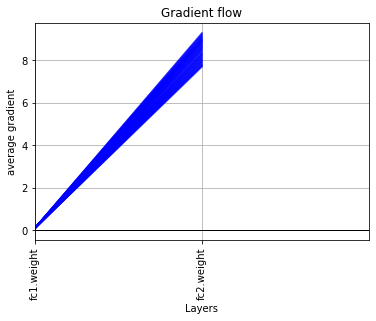

In [30]:
for (images, labels) in train_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    output = model(images)
    loss = criterion(output, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    plot_grad_flow(model.named_parameters())
    

    #print(loss.item())